In [1]:
from linares_plot import *
import sys, os
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from timecourse import *
import statsmodels.formula.api as smf

In [2]:
path = 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_trials.xlsx'
df=pd.read_excel(path)
df.head()

Unnamed: 0  index  type  delay1  delay2    T  NT1  NT2   Dist  Dist_NT1  \
0           0      0     1     0.2    11.8  142  241  321  126.0     214.7   
1           1      1     3     7.0    12.0  204   51  114  311.0      65.1   
2           2      2     3     7.0     5.0   63  200  139  305.0     216.7   
3           3      3     3     7.0    12.0  296  223  156   53.0     204.2   
4           4      4     3     0.2    11.8  312   42  232  113.0      29.4   

   ...  angle_16.345  angle_18.68  angle_21.015  angle_23.35  angle_25.685  \
0  ...    353.306880   301.334949     53.138939   146.178575    172.671739   
1  ...    239.733096   254.710918    277.986737    15.277336     22.813718   
2  ...    358.545119   340.488780    342.883275   330.619499    159.648407   
3  ...     41.006448   233.746383     50.056368    22.161452     12.949112   
4  ...    172.449342   133.071008      3.575792   311.213662    356.300365   

   angle_28.02  angle_30.355  angle_32.69  angle_35.025  brain_region  
0   334.001720    342.383377   335.097734    180.318258        visual  
1    26.142667     29.932089   195.239276    190.548065        visual  
2   157.173739    168.093078   163.740625    328.732464        visual  
3   338.683813    209.808055   201.980750    187.059487        visual  
4     6.816928    337.767719   187.996226    173.282839        visual  

[5 rows x 79 columns]

In [3]:
len(df)

7952

In [4]:
print(df.subject.unique())
print(df.brain_region.unique())
print(df.Condition.unique())

['d001' 'n001' 'b001' 'r001' 's001' 'l001']
['visual' 'ips' 'pfc' 'broca']
['1_0.2' '2_7' '1_7' '2_0.2']


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[

PatsyError: Error evaluating factor: NameError: name 'A_error' is not defined
    decoding_delay_err ~ A_error
                         ^^^^^^^

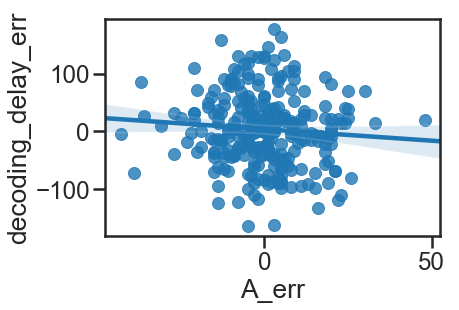

In [19]:
df_1_02 = df.loc[(df['Condition']=='1_0.2') & (df['T_alone'] == df['T']) & (df['brain_region'] =='visual')]
df_1_02['decoding_delay'] = df_1_02[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)
df_1_02['decoding_delay_err'] = 180- df_1_02['decoding_delay'] 
sns.regplot(df_1_02['A_err'], df_1_02['decoding_delay_err'] )
smf.mixedlm(formula='decoding_delay_err ~ A_error', data=df_1_02, groups=df_1_02['subject']).fit()
print(res_m.summary())




C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


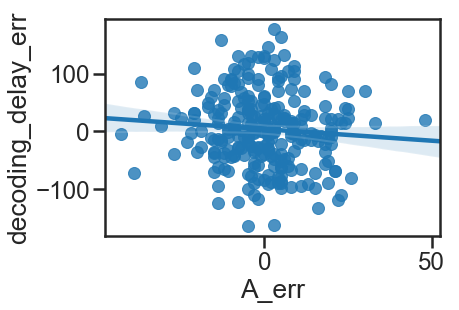

In [16]:
sns.regplot(df_1_02['A_err'], df_1_02['decoding_delay_err'] )

In [13]:
df.columns

Index(['Unnamed: 0', 'index', 'type', 'delay1', 'delay2', 'T', 'NT1', 'NT2',
       'Dist', 'Dist_NT1', 'Dist_NT2', 'distance_T_dist', 'cue', 'order',
       'orient', 'horiz_vertical', 'A_R', 'A_err', 'Abs_angle_error',
       'Error_interference', 'A_DC', 'A_DC_dist', 'Q_DC', 'A_DF', 'A_DF_dist',
       'Q_DF', 'A_DVF', 'Q_DVF', 'A_DVF_dist', 'Q_DVF_dist',
       'presentation_att_cue_time', 'presentation_target_time',
       'presentation_dist_time', 'presentation_probe_time', 'R_T',
       'trial_time', 'disp_time', 'T_alone', 'dist_alone', 'T_close',
       'dist_close', 'subject', 'session', 'run', 'session_run', 'Condition',
       'signal_0.0', 'signal_2.335', 'signal_4.67', 'signal_7.005',
       'signal_9.34', 'signal_11.675', 'signal_14.01', 'signal_16.345',
       'signal_18.68', 'signal_21.015', 'signal_23.35', 'signal_25.685',
       'signal_28.02', 'signal_30.355', 'signal_32.69', 'signal_35.025',
       'angle_0.0', 'angle_2.335', 'angle_4.67', 'angle_7.005', 'angle_9.3

In [6]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['angle_11.675', 'angle_14.01', 'angle_16.345', 'angle_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [180,180], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5,1,'')

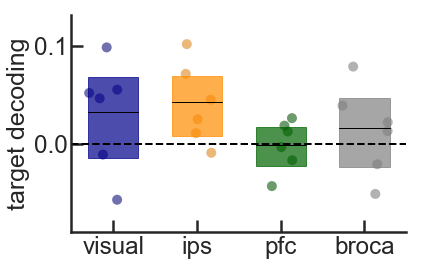

In [17]:
df_1_02 = df.loc[(df['Condition']=='1_0.2')]
df_1_02['decoding_delay'] = df_1_02[['signal_11.675', 'signal_14.01', 'signal_16.345', 'signal_18.68']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_02, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

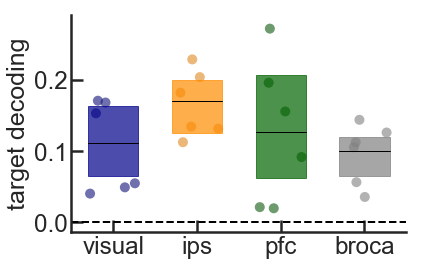

In [18]:
df_1_7 = df.loc[(df['Condition']=='1_7')]
df_1_7['decoding_delay'] = df_1_7[['signal_11.675', 'signal_14.01']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_1_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5,1,'')

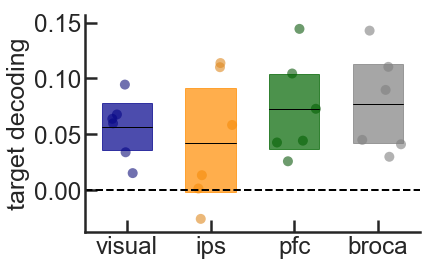

In [24]:
df_2_7 = df.loc[(df['Condition']=='2_7')]
df_2_7['decoding_delay'] = df_2_7[['signal_11.675', 'signal_14.01']].mean(axis=1)

linares_plot(x='brain_region', y='decoding_delay', order=['visual', 'ips', 'pfc', 'broca'], 
              df=df_2_7, palette=['darkblue', 'darkorange', 'darkgreen', 'grey'], CI=0.95,  
             fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,3.5], [0,0], 'k--', linewidth=2)
plt.ylabel('target decoding', fontsize=25)# (std. dist.)')
#plt.gca().set_ylim(-5,10)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('')